In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

**Note**: To run the following code, you will need to download the `creditcard.csv` file from the Kaggle dataset page ([https://www.kaggle.com/mlg-ulb/creditcardfraud](https://www.kaggle.com/mlg-ulb/creditcardfraud)) and upload it to your Colab environment. Once uploaded, replace `'creditcard.csv'` with the actual file path if it's different.

In [ ]:
credit_data = pd.read_csv('creditcard.csv', nrows=50000) # https://www.kaggle.com/mlg-ulb/creditcardfraud
standardized_data_without_class = StandardScaler().fit_transform(credit_data.loc[:,credit_data.columns!='Class'])
data_50k_new = standardized_data_without_class[0:50000]
data_50k_df = pd.DataFrame(data=data_50k_new)

In [ ]:
data_50k_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-2.205156,-0.591967,-0.050988,1.221937,0.851912,-0.056830,0.272394,0.280845,0.036765,0.200798,...,0.281488,0.014406,0.603143,-0.119674,0.098560,-0.016795,-0.418947,0.331473,-0.075526,0.222734
1,-2.205156,0.759756,0.156978,-0.348879,0.187623,0.225160,-0.143037,0.032575,0.025655,-0.309637,...,-0.160613,-0.267480,-0.833726,0.239409,-0.586003,0.071201,0.209494,-0.035810,0.031342,-0.358000
2,-2.205080,-0.591197,-0.828642,0.716108,0.138784,-0.173549,1.292851,0.711154,0.158498,-1.347656,...,0.658856,0.376231,1.377370,1.609738,-1.174069,-1.055912,-0.319161,-0.155289,-0.191120,1.128004
3,-2.205080,-0.383495,-0.119983,0.729221,-0.749127,0.175375,0.870902,0.279294,0.264527,-1.242446,...,-0.352291,-0.107868,0.175828,-0.255069,-1.992456,1.165043,-0.484411,0.148953,0.170936,0.119496
4,-2.205003,-0.485185,0.532242,0.567308,0.155395,-0.105586,-0.007077,0.556360,-0.264940,0.575004,...,0.498239,0.026465,1.419071,-0.165431,0.223666,-0.778851,0.960404,0.552716,0.630027,-0.092000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.171982,-0.405413,0.436774,0.057135,-1.180107,0.393955,-0.281554,0.439000,0.283565,-0.586745,...,-0.087901,0.226084,0.437094,-0.280174,-1.108462,-0.144396,2.733510,-0.444890,-0.069414,-0.210573
49996,1.172058,-2.627548,1.268147,-3.047712,0.651777,-1.034883,-0.692811,-0.812372,2.145689,-0.626661,...,-1.081179,-0.058407,0.789242,0.573905,-0.773126,-0.484113,-0.675633,1.298815,-0.444092,0.026574
49997,1.172134,-0.718137,-0.229670,0.942582,-0.919107,-0.023740,-0.072680,0.450283,-0.020000,0.487855,...,0.339051,-0.180305,0.180297,-0.173702,0.118659,-0.346607,1.626296,0.767563,-0.079507,0.311743
49998,1.172134,-1.460175,1.419560,-2.063160,0.540190,-0.834058,-0.726617,-0.360486,1.562078,-0.796607,...,-0.144775,0.312444,0.883124,-0.032762,0.053316,-1.302376,-0.823509,0.955229,-0.085504,-0.012951


In [ ]:
data_50k_df.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
data_50k_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       50000 non-null  float64
 1   1       50000 non-null  float64
 2   2       50000 non-null  float64
 3   3       50000 non-null  float64
 4   4       50000 non-null  float64
 5   5       50000 non-null  float64
 6   6       50000 non-null  float64
 7   7       50000 non-null  float64
 8   8       50000 non-null  float64
 9   9       50000 non-null  float64
 10  10      50000 non-null  float64
 11  11      50000 non-null  float64
 12  12      50000 non-null  float64
 13  13      50000 non-null  float64
 14  14      50000 non-null  float64
 15  15      50000 non-null  float64
 16  16      50000 non-null  float64
 17  17      50000 non-null  float64
 18  18      50000 non-null  float64
 19  19      50000 non-null  float64
 20  20      50000 non-null  float64
 21  21      50000 non-null  float64
 22

In [ ]:
data_50k_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,...,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,-8.867573e-17,-3.351985e-17,-2.216893e-17,-6.068035e-17,2.287948e-17,5.684342e-18,5.542233e-18,-7.105427e-19,4.689582e-18,-1.591616e-17,...,1.406875e-17,3.410605e-18,-9.556800e-18,-5.613288e-18,5.684342e-18,3.161915e-17,-2.359002e-17,-5.684342e-19,4.547474e-18,6.991741e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,...,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-2.205156e+00,-2.975303e+01,-4.462407e+01,-2.230961e+01,-3.827212e+00,-2.965449e+01,-2.003049e+01,-2.060660e+01,-3.394193e+01,-7.752090e+00,...,-1.895605e+01,-2.749056e+01,-1.330523e+01,-4.529398e+01,-4.787851e+00,-1.738384e+01,-3.188001e+00,-2.208866e+01,-2.874155e+01,-3.686317e-01
25%,-5.359902e-01,-3.974413e-01,-3.526090e-01,-3.155729e-01,-6.477008e-01,-4.316007e-01,-5.646797e-01,-3.786147e-01,-1.637903e-01,-6.054680e-01,...,-2.936686e-01,-2.751959e-01,-6.626108e-01,-2.357543e-01,-5.558044e-01,-6.010312e-01,-7.011631e-01,-1.755891e-01,-3.264978e-02,-3.384844e-01
50%,3.467193e-01,-1.411086e-03,4.168525e-02,6.832037e-02,4.034687e-03,-2.222513e-02,-1.949570e-01,3.375128e-02,4.111922e-03,-9.045693e-02,...,-9.665734e-02,-5.333000e-02,3.891606e-02,-1.991313e-02,9.077548e-02,9.072791e-02,-1.852494e-01,1.061729e-02,5.359402e-02,-2.698204e-01
75%,7.669174e-01,7.405194e-01,4.425676e-01,4.892684e-01,6.302776e-01,3.830208e-01,2.975926e-01,4.245676e-01,2.275539e-01,5.733761e-01,...,1.717083e-01,1.861357e-01,6.495527e-01,2.009712e-01,6.617273e-01,6.519441e-01,5.576405e-01,2.034543e-01,2.152779e-01,-3.168517e-02
max,1.172211e+00,1.166937e+00,1.115098e+01,2.259509e+00,1.164700e+01,2.481933e+01,1.710084e+01,2.869272e+01,1.630439e+01,8.468076e+00,...,3.612736e+01,3.076589e+01,9.269667e+00,2.939946e+01,6.741861e+00,1.227580e+01,6.975409e+00,2.868049e+01,1.010915e+02,5.066120e+01


In [ ]:
# Check for NaN values in the dataframe
print("Number of NaN values per column:")
display(data_50k_df.isnull().sum())

# Check for total NaN values in the dataframe
print("\nTotal number of NaN values in the dataframe:")
print(data_50k_df.isnull().sum().sum())

Number of NaN values per column:


,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0



Total number of NaN values in the dataframe:
0


In [ ]:
# Drop rows with NaN values
data_50k_df = data_50k_df.dropna()

# Separate features and target variable
X = credit_data.drop(columns=['Class'])
y = credit_data['Class']

In [ ]:
# Train OneClassSVM model with RBF kernel
clf_svm_rbf = OneClassSVM(kernel="rbf", degree=3, gamma=0.1, nu=0.01)
y_predict_rbf = clf_svm_rbf.fit_predict(data_50k_df)

# Train OneClassSVM model with Sigmoid kernel
clf_svm_sigmoid = OneClassSVM(kernel="sigmoid", degree=3, gamma=0.1, nu=0.01)
y_predict_sigmoid = clf_svm_sigmoid.fit_predict(data_50k_df)

# Train OneClassSVM model with Linear kernel
clf_svm_linear = OneClassSVM(kernel="linear", degree=3, gamma=0.1, nu=0.01)
y_predict_linear = clf_svm_linear.fit_predict(data_50k_df)

# Train OneClassSVM model with Poly kernel
clf_svm_poly = OneClassSVM(kernel="poly", degree=3, gamma=0.1, nu=0.01)
y_predict_poly = clf_svm_poly.fit_predict(data_50k_df)

In [ ]:
# Evaluate RBF kernel model
svm_predict_rbf = pd.Series(y_predict_rbf).replace([-1,1],[1,0])
accuracy_rbf = accuracy_score(y, svm_predict_rbf)
print("Accuracy for RBF kernel:", accuracy_rbf)

# Evaluate Sigmoid kernel model
svm_predict_sigmoid = pd.Series(y_predict_sigmoid).replace([-1,1],[1,0])
accuracy_sigmoid = accuracy_score(y, svm_predict_sigmoid)
print("Accuracy for Sigmoid kernel:", accuracy_sigmoid)

# Evaluate Linear kernel model
svm_predict_linear = pd.Series(y_predict_linear).replace([-1,1],[1,0])
accuracy_linear = accuracy_score(y, svm_predict_linear)
print("Accuracy for Linear kernel:", accuracy_linear)

# Evaluate Poly kernel model
svm_predict_poly = pd.Series(y_predict_poly).replace([-1,1],[1,0])
accuracy_poly = accuracy_score(y, svm_predict_poly)
print("Accuracy for Poly kernel:", accuracy_poly)

# Identify anomalies using RBF model predictions for plotting
svm_anomalies_rbf = data_50k_df[svm_predict_rbf==1]

# Note: The plot_OCSVM function will now use svm_anomalies_rbf for plotting.
# You can uncomment the plot_OCSVM calls below to visualize results for different feature pairs.
# plot_OCSVM(1)  # change the integer value to visualize different pairs of features
# plot_OCSVM(2)
# plot_OCSVM(3)

Accuracy for RBF kernel: 0.9641
Accuracy for Sigmoid kernel: 0.98922
Accuracy for Linear kernel: 0.60086
Accuracy for Poly kernel: 0.97936


In [ ]:
from sklearn.metrics import classification_report

# Classification report for RBF kernel model
print("Classification Report for RBF kernel:")
print(classification_report(y, svm_predict_rbf))

# Classification report for Sigmoid kernel model
print("Classification Report for Sigmoid kernel:")
print(classification_report(y, svm_predict_sigmoid))

# Classification report for Linear kernel model
print("Classification Report for Linear kernel:")
print(classification_report(y, svm_predict_linear))

# Classification report for Poly kernel model
print("Classification Report for Poly kernel:")
print(classification_report(y, svm_predict_poly))

Classification Report for RBF kernel:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     49852
           1       0.03      0.39      0.06       148

    accuracy                           0.96     50000
   macro avg       0.52      0.68      0.52     50000
weighted avg       1.00      0.96      0.98     50000

Classification Report for Sigmoid kernel:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     49852
           1       0.11      0.36      0.17       148

    accuracy                           0.99     50000
   macro avg       0.55      0.68      0.58     50000
weighted avg       1.00      0.99      0.99     50000

Classification Report for Linear kernel:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75     49852
           1       0.00      0.18      0.00       148

    accuracy                           0.60     50000
   macr

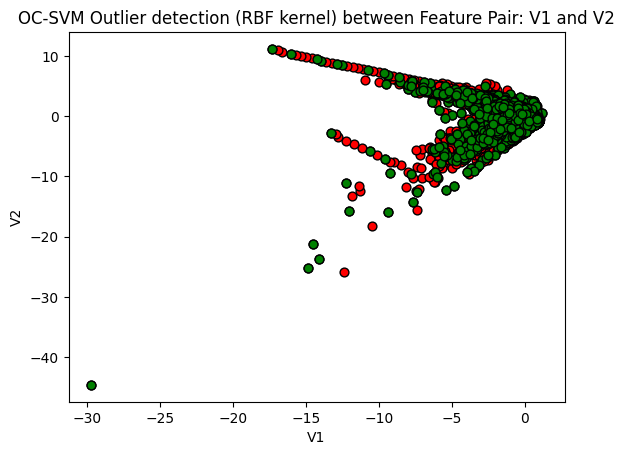

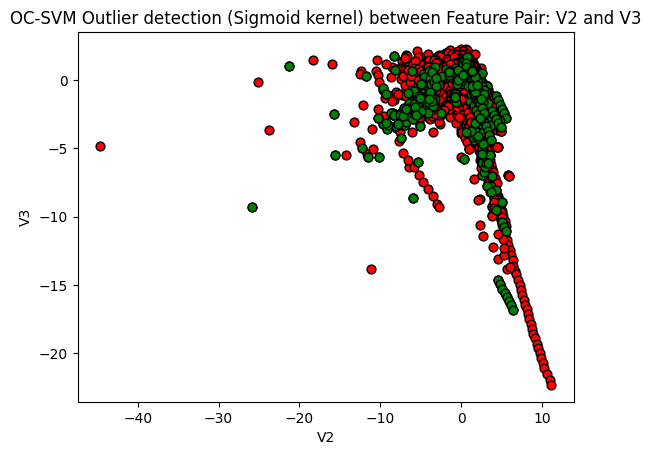

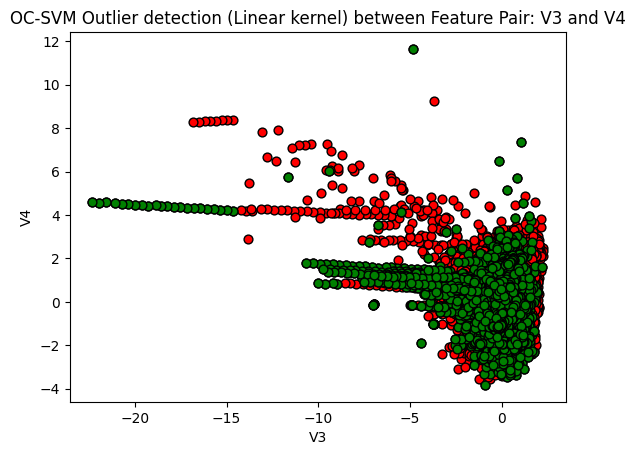

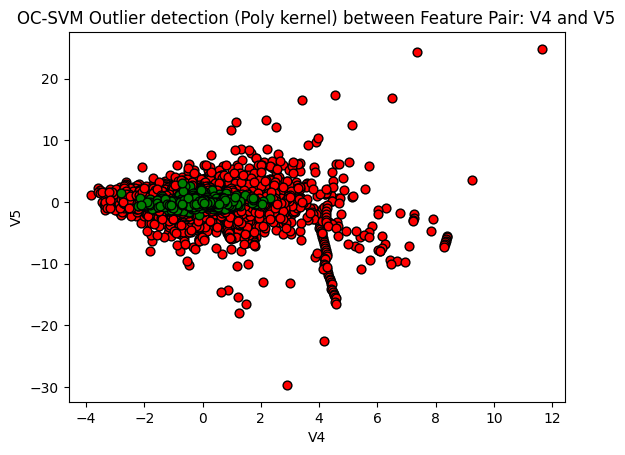

In [ ]:
def plot_OCSVM(anomalies_df, i, kernel_name):
    plt.scatter(data_50k_df.iloc[:,i],data_50k_df.iloc[:,i+1],c='red',s=40, edgecolor="k")
    plt.scatter(anomalies_df.iloc[:,i],anomalies_df.iloc[:,i+1],c='green', s=40, edgecolor="k")
    plt.title("OC-SVM Outlier detection ({} kernel) between Feature Pair: V{} and V{}".format(kernel_name, i,i+1))
    plt.xlabel("V{}".format(i))
    plt.ylabel("V{}".format(i+1))
    plt.show()

# Identify anomalies for each model
svm_anomalies_rbf = data_50k_df[pd.Series(y_predict_rbf).replace([-1,1],[1,0])==1]
svm_anomalies_sigmoid = data_50k_df[pd.Series(y_predict_sigmoid).replace([-1,1],[1,0])==1]
svm_anomalies_linear = data_50k_df[pd.Series(y_predict_linear).replace([-1,1],[1,0])==1]
svm_anomalies_poly = data_50k_df[pd.Series(y_predict_poly).replace([-1,1],[1,0])==1]

# Visualize anomalies for each model (plotting different feature pairs as examples)
plot_OCSVM(svm_anomalies_rbf, 1, "RBF")
plot_OCSVM(svm_anomalies_sigmoid, 2, "Sigmoid")
plot_OCSVM(svm_anomalies_linear, 3, "Linear")
plot_OCSVM(svm_anomalies_poly, 4, "Poly")